<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION PROJECT - FACEBOOK LIKE PREDICTION </h1>
     


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
mydf=pd.read_csv('Likes.csv')
mydf.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [7]:
mydf.dtypes

userid                    int64
age                       int64
dob_day                   int64
dob_year                  int64
dob_month                 int64
gender                   object
tenure                    int64
friend_count              int64
friendships_initiated     int64
likes                     int64
likes_received            int64
mobile_likes              int64
mobile_likes_received     int64
www_likes                 int64
www_likes_received        int64
dtype: object

In [8]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 2104 non-null   int64 
 1   age                    2104 non-null   int64 
 2   dob_day                2104 non-null   int64 
 3   dob_year               2104 non-null   int64 
 4   dob_month              2104 non-null   int64 
 5   gender                 2102 non-null   object
 6   tenure                 2104 non-null   int64 
 7   friend_count           2104 non-null   int64 
 8   friendships_initiated  2104 non-null   int64 
 9   likes                  2104 non-null   int64 
 10  likes_received         2104 non-null   int64 
 11  mobile_likes           2104 non-null   int64 
 12  mobile_likes_received  2104 non-null   int64 
 13  www_likes              2104 non-null   int64 
 14  www_likes_received     2104 non-null   int64 
dtypes: int64(14), object(

In [10]:
mydf.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   2
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [11]:
mydf['gender'].value_counts()

male      1400
female     702
Name: gender, dtype: int64

In [12]:
mydf['gender'].fillna('male',inplace=True)
mydf['gender'].value_counts()

male      1402
female     702
Name: gender, dtype: int64

In [14]:
mydf.drop('userid',axis=1,inplace=True) #userid irrelevant

In [16]:
mydf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2104.0,33.427281,16.155287,13.0,22.00,28.0,41.25,108.0
dob_day,2104.0,13.144962,9.242513,1.0,4.75,12.5,21.00,31.0
dob_year,2104.0,1979.572719,16.155287,1905.0,1971.75,1985.0,1991.00,2000.0
dob_month,2104.0,5.882605,3.698839,1.0,2.00,6.0,9.00,12.0
tenure,2104.0,274.701046,297.508563,0.0,54.00,191.0,387.00,2303.0
friend_count,2104.0,2.039924,1.397070,0.0,1.00,2.0,3.00,5.0
friendships_initiated,2104.0,1.453422,1.242272,0.0,1.00,1.0,2.00,5.0
likes,2104.0,27.654468,169.454213,1.0,1.00,4.0,14.00,5937.0
likes_received,2104.0,7.934886,44.784909,0.0,0.00,1.0,3.00,1326.0
mobile_likes,2104.0,17.676331,155.249561,0.0,0.00,1.0,6.00,5704.0


<h2 class="list-group-item list-group-item-action active" >EXPLORATORY DATA ANALYSIS</h2>

>### Inference on skewness and outliers with suitable plots

In [17]:
mydf.iloc[:,1:14].head()

,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [18]:
mydf['mobile_likes_received'].value_counts()

0      1257
1       297
2       135
3        74
4        60
       ... 
152       1
128       1
122       1
116       1
266       1
Name: mobile_likes_received, Length: 66, dtype: int64

In [21]:
mydf1=mydf.iloc[:,[1,2,3,4,6,7]].head()

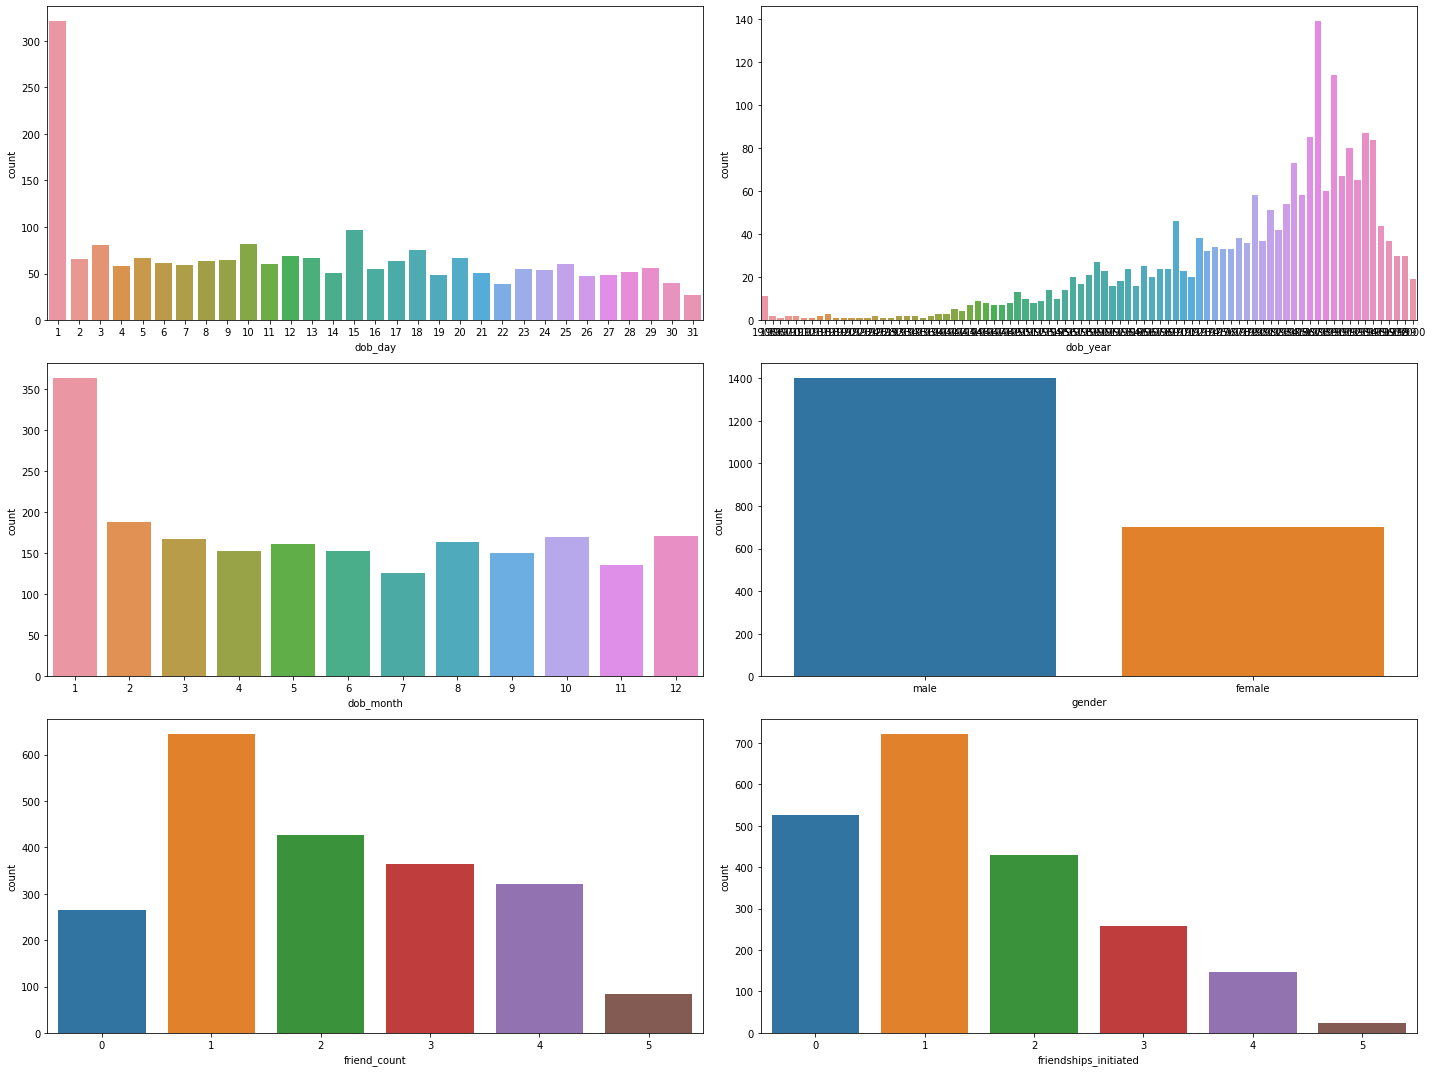

In [22]:
fig,ax=plt.subplots(3,2,figsize=(20,15))
for variable,subplot  in  zip(mydf1.columns,ax.flatten()):
    sns.countplot(mydf[variable],ax=subplot)
    plt.tight_layout()

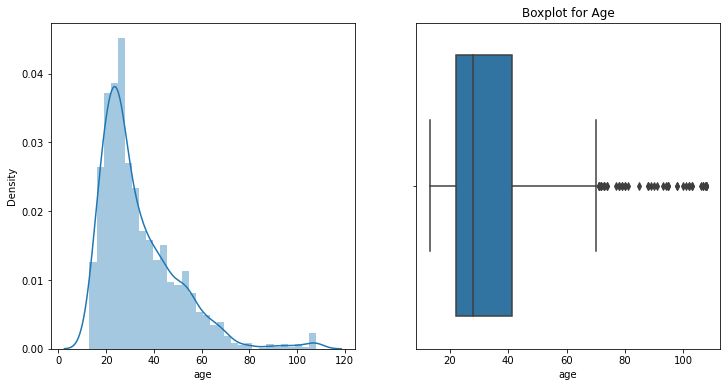

In [24]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(mydf['age'])

plt.subplot(1,2,2)
sns.boxplot(mydf['age'])
plt.title("Boxplot for Age")

plt.show()

In [26]:
mydf['age'].skew()

1.6285741973183543

For Age column ,  the data is positvely skewed and the outliers lie above upper portion of Q3  quartile

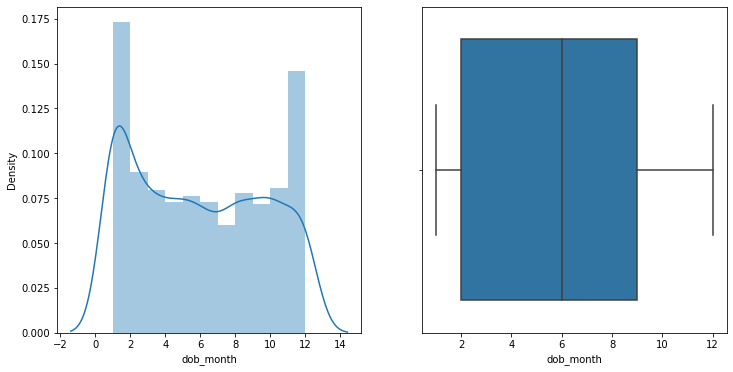

In [27]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(mydf['dob_month'])

plt.subplot(1,2,2)
sns.boxplot(mydf['dob_month'])

plt.show()

In [29]:
mydf['dob_day'].skew()

0.24190766041491962

For Date_of_Birth Day column ,  the data is not skewed very much and no   outliers.

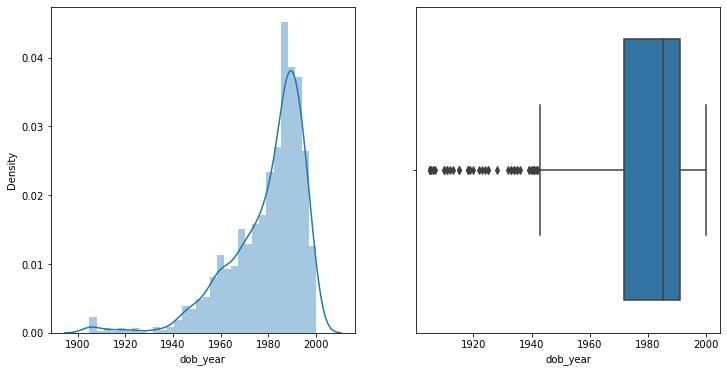

In [30]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(mydf['dob_year'])

plt.subplot(1,2,2)
sns.boxplot(mydf['dob_year'])

plt.show()

In [32]:
mydf['dob_year'].skew()

-1.6285741973183634

For Date_of_Birth Year column ,  the data is negatively skewed and   outliers are present below the Q1  quartile.

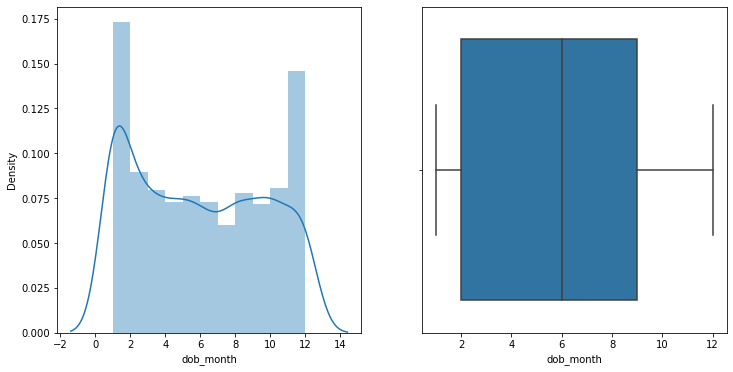

In [33]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(mydf['dob_month'])

plt.subplot(1,2,2)
sns.boxplot(mydf['dob_month'])

plt.show()

In [35]:
mydf['dob_month'].skew()

0.1602823038779257

For Date_of_Birth  month column ,  the data is not skewed and   no  outliers are present .

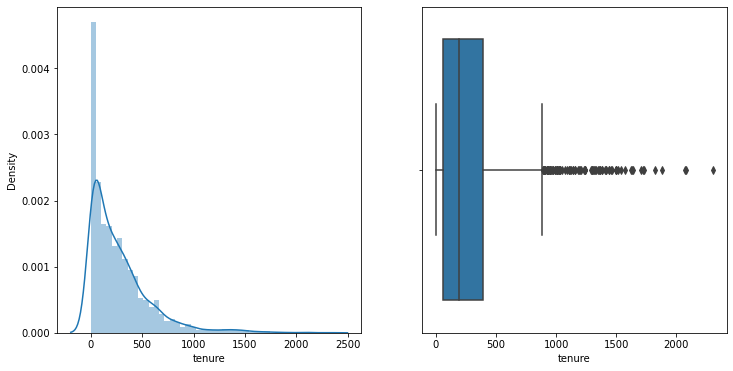

In [36]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(mydf['tenure'])

plt.subplot(1,2,2)
sns.boxplot(mydf['tenure'])

plt.show()

In [38]:
mydf['tenure'].skew()

2.0835496317796776

For Tenure column ,  the data is positively skewed and     outliers are present  above the Q3 Quartile .

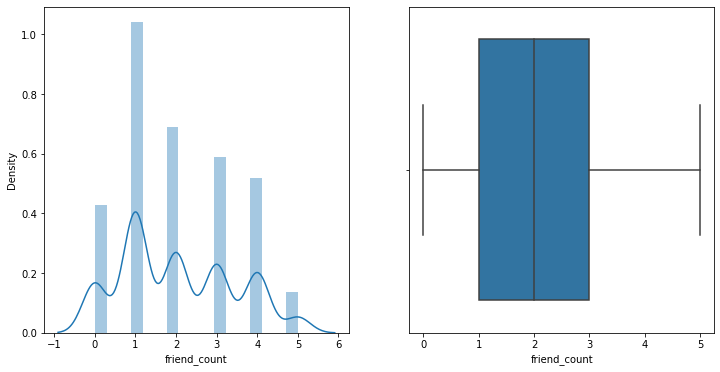

In [39]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(mydf['friend_count'])

plt.subplot(1,2,2)
sns.boxplot(mydf['friend_count'])

plt.show()

In [41]:
mydf['friend_count'].skew()

0.3393673207205632

For Friend count column ,  the data is not skewed and   no  outliers are present .

>### Heatmap to understand the correlation among independent variables

<AxesSubplot:>

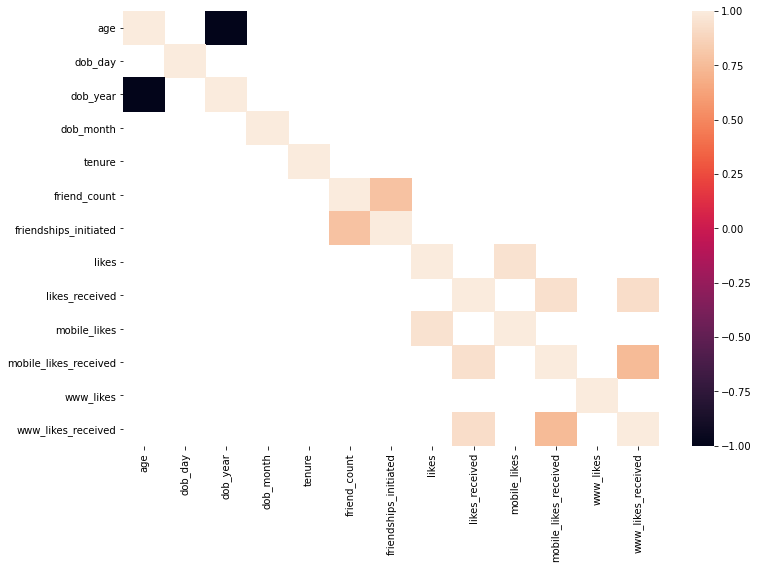

In [44]:
plt.rcParams['figure.figsize']=[12,8]
sns.heatmap(mydf.corr()[np.abs(mydf.corr())>0.7])

There is a correlation   between the 

- A positive correlationLikes_received and  www_likes_received

- A positive correlationMobile_likes_received  and  www_likes_received

- A positive correlation between www_likes_received and mobile_likes_received.

- Negative correlation between dob_year and age

- Positive correlation between likes and mobile_likes

- Moderately positive correlation  between  friend_count and friendships_initiated.

<h2 class="list-group-item list-group-item-action active" >Train and Test Dataset    </h2>

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
mydf.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [48]:
mydf.select_dtypes(include='object').head()

,gender
0,male
1,male
2,female
3,male
4,male


In [49]:
mydf.shape

(2104, 14)

In [51]:
mydf2=mydf.iloc[:,[0,1,2,3,5,6,7,9,10,11,12,13]]
encoded=pd.get_dummies(mydf["gender"],drop_first=True)

mydf3=pd.concat([mydf2,encoded],axis=1)
mydf3.head()

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,male
0,13,2,2000,2,0,0,0,0,0,0,1,0,1
1,14,22,1999,1,104,0,0,0,0,0,1,0,1
2,19,18,1994,10,212,0,0,0,0,0,1,0,0
3,21,1,1992,1,328,0,0,0,0,0,1,0,1
4,23,10,1990,2,580,0,0,0,0,0,1,0,1


In [52]:
from scipy import stats
from scipy.stats import shapiro
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold


In [53]:
a=mydf3.columns
a.to_list()

['age',
 'dob_day',
 'dob_year',
 'dob_month',
 'tenure',
 'friend_count',
 'friendships_initiated',
 'likes_received',
 'mobile_likes',
 'mobile_likes_received',
 'www_likes',
 'www_likes_received',
 'male']

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [55]:
s=scaler.fit_transform(mydf2)
X=pd.DataFrame(data=s,columns=mydf2.columns.to_list())
X=pd.concat([X,encoded],axis=1)
X.head()

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,male
0,-1.264734,-1.206123,1.264734,-1.049932,-0.923558,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,1
1,-1.202820,0.958305,1.202820,-1.320351,-0.573905,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,1
2,-0.893250,0.525419,0.893250,1.113424,-0.210804,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,0
3,-0.769422,-1.314345,0.769422,-1.320351,0.179194,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,1
4,-0.645594,-0.340352,0.645594,-1.049932,1.026429,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,1


In [56]:
y=mydf['likes']
y.value_counts()

1       626
2       244
3       166
4       127
5        94
       ... 
1580      1
45        1
51        1
57        1
600       1
Name: likes, Length: 178, dtype: int64

In [70]:
y1=(y-y.mean())/y.std()
y1.head()

0   -0.157296
1   -0.157296
2   -0.157296
3   -0.157296
4   -0.157296
Name: likes, dtype: float64

In [57]:
X=sm.add_constant(X)
X.head()

,const,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,male
0,1.0,-1.264734,-1.206123,1.264734,-1.049932,-0.923558,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,1
1,1.0,-1.202820,0.958305,1.202820,-1.320351,-0.573905,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,1
2,1.0,-0.893250,0.525419,0.893250,1.113424,-0.210804,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,0
3,1.0,-0.769422,-1.314345,0.769422,-1.320351,0.179194,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,1
4,1.0,-0.645594,-0.340352,0.645594,-1.049932,1.026429,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,1


In [192]:
df.shape

(2104, 14)

In [59]:
mydf_likes=mydf.iloc[:,[8,9,10,11,12,13]]
mydf_likes.describe()

,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
mean,27.654468,7.934886,17.676331,4.091255,9.978137,3.843631
std,169.454213,44.784909,155.249561,25.828290,53.746481,22.127323
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,14.000000,3.000000,6.000000,2.000000,3.000000,1.000000
max,5937.000000,1326.000000,5704.000000,679.000000,1580.000000,647.000000


In [63]:
mydf.drop(columns=["likes",])

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13,2,2000,2,male,0,0,0,0,0,0,1,0
1,14,22,1999,1,male,104,0,0,0,0,0,1,0
2,19,18,1994,10,female,212,0,0,0,0,0,1,0
3,21,1,1992,1,male,328,0,0,0,0,0,1,0
4,23,10,1990,2,male,580,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,19,13,1994,3,male,304,5,2,2,1,2,0,0
2100,19,21,1994,4,male,12,5,1,4,1,4,0,0
2101,20,4,1993,4,male,128,5,5,3,1,3,0,0
2102,25,19,1988,1,male,52,5,5,9,1,1,0,8


In [64]:
mydf.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


We use variance_inflation_factor  method  to  remove the Multi-Collinearity

In [65]:
mydf_numeric = mydf.select_dtypes(include=[np.number])
mydf_numeric.head()

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13,2,2000,2,0,0,0,1,0,0,0,1,0
1,14,22,1999,1,104,0,0,1,0,0,0,1,0
2,19,18,1994,10,212,0,0,1,0,0,0,1,0
3,21,1,1992,1,328,0,0,1,0,0,0,1,0
4,23,10,1990,2,580,0,0,1,0,0,0,1,0


In [66]:
vif=pd.DataFrame()
vif['VIF_Factor']=[variance_inflation_factor(mydf_numeric.values,i) for  i  in  range(mydf_numeric.shape[1])]
vif['Features']=mydf_numeric.columns
vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,Features
7,inf,likes
8,inf,likes_received
9,inf,mobile_likes
10,inf,mobile_likes_received
11,inf,www_likes
12,inf,www_likes_received
2,10.253155,dob_year
0,5.348577,age
5,2.709166,friend_count
6,2.699337,friendships_initiated


In [67]:
X.head()

,const,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,male
0,1.0,-1.264734,-1.206123,1.264734,-1.049932,-0.923558,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,1
1,1.0,-1.202820,0.958305,1.202820,-1.320351,-0.573905,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,1
2,1.0,-0.893250,0.525419,0.893250,1.113424,-0.210804,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,0
3,1.0,-0.769422,-1.314345,0.769422,-1.320351,0.179194,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,1
4,1.0,-0.645594,-0.340352,0.645594,-1.049932,1.026429,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,1


In [68]:
X1=X[['const', 'age', 'dob_day', 'dob_year', 'dob_month', 'tenure',
       'friend_count', 'friendships_initiated',
       'mobile_likes', 'mobile_likes_received',
       'www_likes_received', 'male']]
X1.head()

,const,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,mobile_likes,mobile_likes_received,www_likes_received,male
0,1.0,-1.264734,-1.206123,1.264734,-1.049932,-0.923558,-1.460491,-1.170249,-0.113885,-0.15844,-0.173746,1
1,1.0,-1.202820,0.958305,1.202820,-1.320351,-0.573905,-1.460491,-1.170249,-0.113885,-0.15844,-0.173746,1
2,1.0,-0.893250,0.525419,0.893250,1.113424,-0.210804,-1.460491,-1.170249,-0.113885,-0.15844,-0.173746,0
3,1.0,-0.769422,-1.314345,0.769422,-1.320351,0.179194,-1.460491,-1.170249,-0.113885,-0.15844,-0.173746,1
4,1.0,-0.645594,-0.340352,0.645594,-1.049932,1.026429,-1.460491,-1.170249,-0.113885,-0.15844,-0.173746,1


In [71]:
y1.head()

0   -0.157296
1   -0.157296
2   -0.157296
3   -0.157296
4   -0.157296
Name: likes, dtype: float64

In [72]:
X1=sm.add_constant(X1)

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,random_state=39,test_size=0.3)

In [74]:
X_train.shape

(1472, 12)

In [75]:
X_test.shape

(632, 12)

In [76]:
y_train.shape

(1472,)

In [77]:
y_test.shape

(632,)

<h2 class="list-group-item list-group-item-action active" >Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

from sklearn.linear_model import SGDRegressor

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [80]:
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     3539.
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:59:40   Log-Likelihood:                 77.648
No. Observations:                1472   AIC:                            -133.3
Df Residuals:                    1461   BIC:                            -75.06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [81]:
y_train_pred=model.predict(X_train)
mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=np.sqrt(mse_train)
print("RMSE Train value :",rmse_train)

RMSE Train value : 0.22953764427680234


In [82]:
SSR=np.sum((y_train_pred - y_train.mean())**2)
print("Sum of Squared Residuals:",SSR)

Sum of Squared Residuals: 1878.4455386772802


In [83]:
SSE=np.sum((y_train - y_train_pred)**2)
print("Sum of Squared Errors:",SSE)

Sum of Squared Errors: 77.55604436629176


In [84]:
SST = np.sum((y_train - y_train.mean())**2)
print("Sum of Squared Total:",SST)

Sum of Squared Total: 1956.0015830435746


In [85]:
model.rsquared

0.960349702659436

In [86]:
model.rsquared_adj

0.9600783111649762

In [87]:
y_test_pred=model.predict(X_test)
mse_test=mean_squared_error(y_test,y_test_pred)
rmse_test=np.sqrt(mse_test)
print("RMSE Test value :",rmse_test)

RMSE Test value : 0.35042541008744227


# RFE MODEL

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y1,random_state=39,test_size=0.3)
linreg=LinearRegression()
rfe=RFE(estimator=linreg,n_features_to_select=5)
rfe_model=rfe.fit(X_train,y_train)
feat=pd.Series(data=rfe_model.ranking_,index=X_train.columns)
print(feat)

const                    10
age                       4
dob_day                   3
dob_year                  5
dob_month                 6
tenure                    1
friend_count              1
friendships_initiated     8
likes_received            2
mobile_likes              1
mobile_likes_received     1
www_likes                 1
www_likes_received        7
male                      9
dtype: int32


In [89]:
signi_feat_rfe = feat[feat==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['tenure', 'friend_count', 'mobile_likes', 'mobile_likes_received',
       'www_likes'],
      dtype='object')


In [90]:
new_X_train = X_train[['dob_day', 'friend_count', 'friendships_initiated', 'mobile_likes',
       'www_likes']]
new_X_train=sm.add_constant(new_X_train)
new_X_train.head()

,const,dob_day,friend_count,friendships_initiated,mobile_likes,www_likes
2007,1.0,-1.314345,1.403324,0.440087,0.627034,-0.074034
970,1.0,0.417198,-0.028584,0.440087,-0.107442,-0.185696
1434,1.0,-0.773238,0.687370,1.245255,-0.107442,-0.167086
1258,1.0,1.282969,-0.028584,0.440087,-0.113885,0.335392
733,1.0,-1.314345,-0.744537,-1.170249,-0.030129,-0.185696


In [91]:
model1=sm.OLS(y_train,new_X_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.671e+32
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:00:43   Log-Likelihood:                 48886.
No. Observations:                1472   AIC:                        -9.776e+04
Df Residuals:                    1466   BIC:                        -9.773e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.475e-

<h2 class="list-group-item list-group-item-action active" >Linear Regression Assumptions Validation - 
Linearity, Homoscedasticity, Normality and Outliers</h2>

# Linearity of the model

In [92]:
fitted_values=model.fittedvalues
fitted_values

2007    0.508265
970    -0.127466
1434   -0.121090
1258   -0.130577
733    -0.008102
          ...   
927    -0.144380
587    -0.128118
388    -0.140645
1088   -0.117156
105    -0.113605
Length: 1472, dtype: float64

In [93]:
residuals=model.resid
residuals

2007    0.042595
970    -0.029830
1434   -0.030305
1258    0.132616
733    -0.078379
          ...   
927    -0.012916
587    -0.011475
388    -0.016651
1088   -0.028337
105    -0.037790
Length: 1472, dtype: float64

<AxesSubplot:>

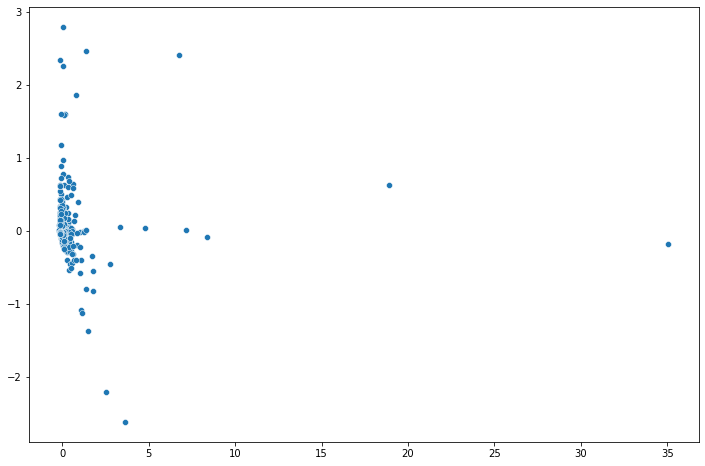

In [94]:
sns.scatterplot(x=fitted_values,y=residuals)

# Homoscedasticity (equal variance) of residuals

In [95]:
sms.het_breuschpagan(model.resid, X_train.values)

(822.0767948849557,
 2.5778747409516978e-167,
 167.8844671166089,
 7.139520558503988e-250)

# Normality of residuals

In [96]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     3539.
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:01:06   Log-Likelihood:                 77.648
No. Observations:                1472   AIC:                            -133.3
Df Residuals:                    1461   BIC:                            -75.06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0086      0.010      0.833      0.405      -0.012       0.029
age                      -0.0025      0.003     -0.798      0.425      -0.009       0.004
dob_day                   0.0064      0.006      1.037      0.300      -0.006       0.019
dob_year                  0.0025      0.003      0.798      0.425      -0.004       0.009
dob_month                 0.0023      0.006      0.359      0.719      -0.010       0.015
tenure                    0.0022      0.006      0.356      0.722      -0.010       0.014
friend_count             -0.0014      0.010     -0.145      0.884      -0.021       0.018
friendships_initiated     0.0041      0.010      0.421      0.674      -0.015       0.023
mobile_likes              0.8986      0.005    170.452      0.000       0.888       0.909
mobile_likes_received    -0.0139      0.008     -1.637      0.102      -0.031       0.003
www_likes_received        0.2480      0.010     25.831      0.000       0.229       0.267
male                     -0.0103      0.013     -0.811      0.418      -0.035       0.015
==============================================================================
Omnibus:                     1381.908   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           318980.465
Skew:                           3.715   Prob(JB):                         0.00
Kurtosis:                      74.733   Cond. No.                     5.67e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0.5, 1.0, 'Normality of Residuals:')

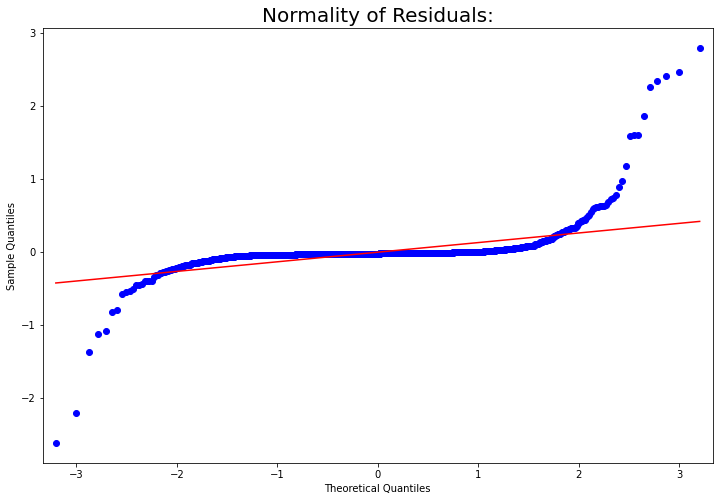

In [97]:
qqplot(model.resid,line='r')
plt.title("Normality of Residuals:",fontsize=20)

In [98]:
shapiro(model.resid)

ShapiroResult(statistic=0.3342168927192688, pvalue=0.0)

# Identifying Outliers/influential Cases

In [99]:
a=mydf.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12,13]]
a.columns

Index(['age', 'dob_day', 'dob_year', 'dob_month', 'tenure', 'friend_count',
       'friendships_initiated', 'likes', 'likes_received', 'mobile_likes',
       'mobile_likes_received', 'www_likes', 'www_likes_received'],
      dtype='object')

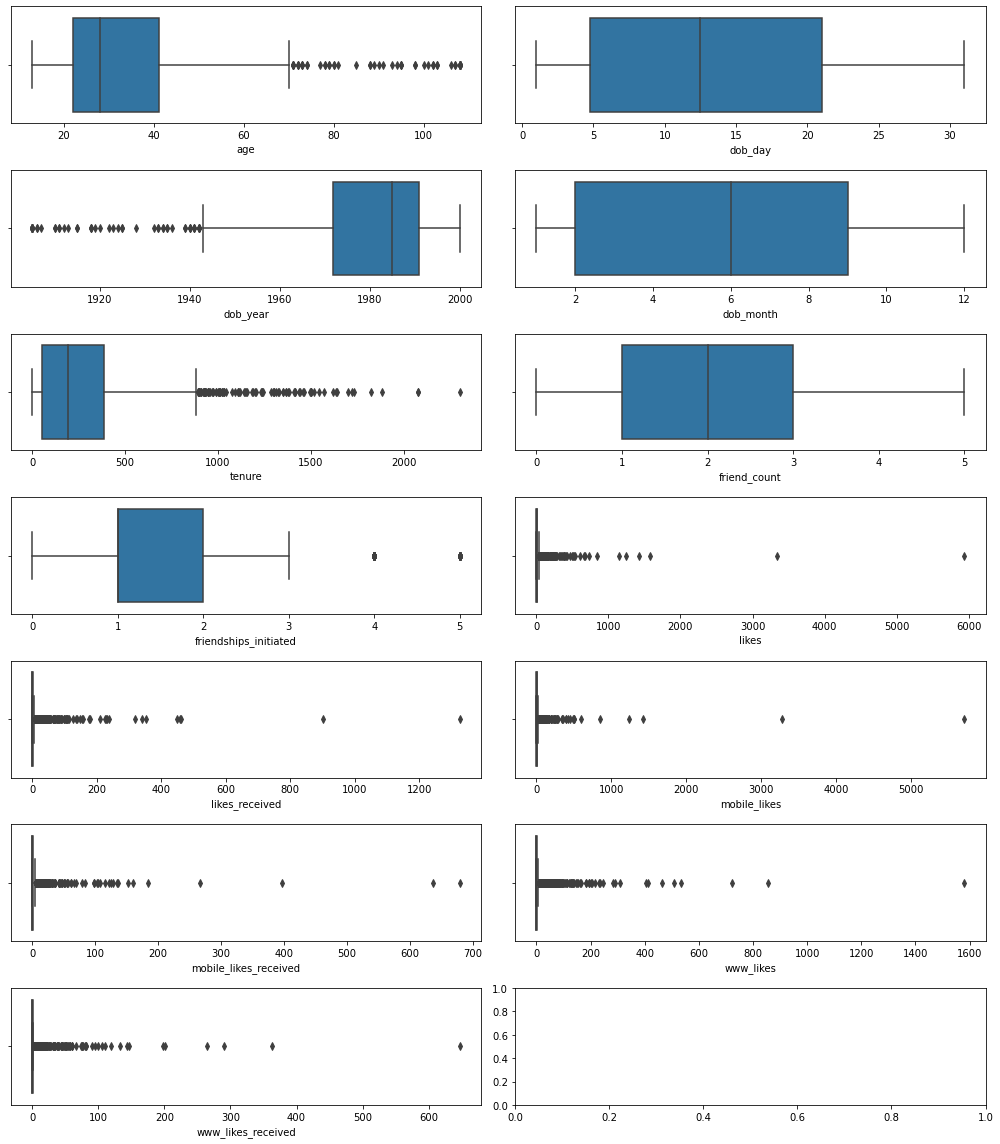

In [100]:
fig,ax=plt.subplots(7,2,figsize=(14,16))
for variable,subplot in zip(a.columns,ax.flatten()):
    sns.boxplot(mydf[variable],ax=subplot)
    plt.tight_layout()

In [311]:
mydf.shape

(2104, 14)

In [104]:
q1=mydf.quantile(0.25)
q3=mydf.quantile(0.75)
iqr=q3-q1
mydf_out=mydf[~((mydf<(q1-1.5*iqr))|(mydf>(q3+1.5*iqr))).any(axis=1)]
mydf_out.shape

(1178, 14)

<h2 class="list-group-item list-group-item-action active" >Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>

In [105]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=LinearRegression())# an instance of rfecv
rfe_model = rfe_model.fit(X_train, y_train)       #fit the model

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
print(feat_index)# ranking of each feature
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)
print(rfe_model.n_features_)

const                    10
age                       4
dob_day                   3
dob_year                  5
dob_month                 6
tenure                    1
friend_count              1
friendships_initiated     8
likes_received            2
mobile_likes              1
mobile_likes_received     1
www_likes                 1
www_likes_received        7
male                      9
dtype: int32
Index(['tenure', 'friend_count', 'mobile_likes', 'mobile_likes_received',
       'www_likes'],
      dtype='object')
5


In [106]:
new=X_train[['dob_day', 'friend_count', 'friendships_initiated', 'mobile_likes',
       'www_likes']]

k=KFold(n_splits=10, shuffle=True, random_state=3)

scores = cross_val_score(estimator = LinearRegression(), 
                         X = new, 
                         y = y_train, 
                         cv = k, 
                         scoring = 'r2')

In [107]:
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Minimum score obtained:  1.0
Maximum score obtained:  1.0
Average score obtained:  1.0
